 BIAS ANALYSIS IN DATA
 Installing required packages...
 pingouin already installed
 statsmodels already installed

 STEP 1: Extracting demographic information
 Analyzing Reading Task files...
   - HC: 54 files
   - PT: 58 files
 Unable to parse: 59_PF36_x.csv

 Demographic dataset created: 111 participants

 Data overview:
  participant_id diagnosis     sex  age  education
0      57_CF25_3        HC  Female   25          3
1      25_CF59_3        HC  Female   59          3
2      41_CM71_2        HC    Male   71          2
3      40_CF59_1        HC  Female   59          1
4      45_CF40_3        HC  Female   40          3
5      04_CF57_3        HC  Female   57          3
6      48_CF34_3        HC  Female   34          3
7      55_CM29_3        HC    Male   29          3
8      13_CF45_2        HC  Female   45          2
9      20_CM51_3        HC    Male   51          3

 Descriptive statistics:
   - Total participants: 111
   - HC: 54
   - PT: 57

 STEP 2: TASK n°2 - Description o

/home/rsana/.local/lib/python3.9/site-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")


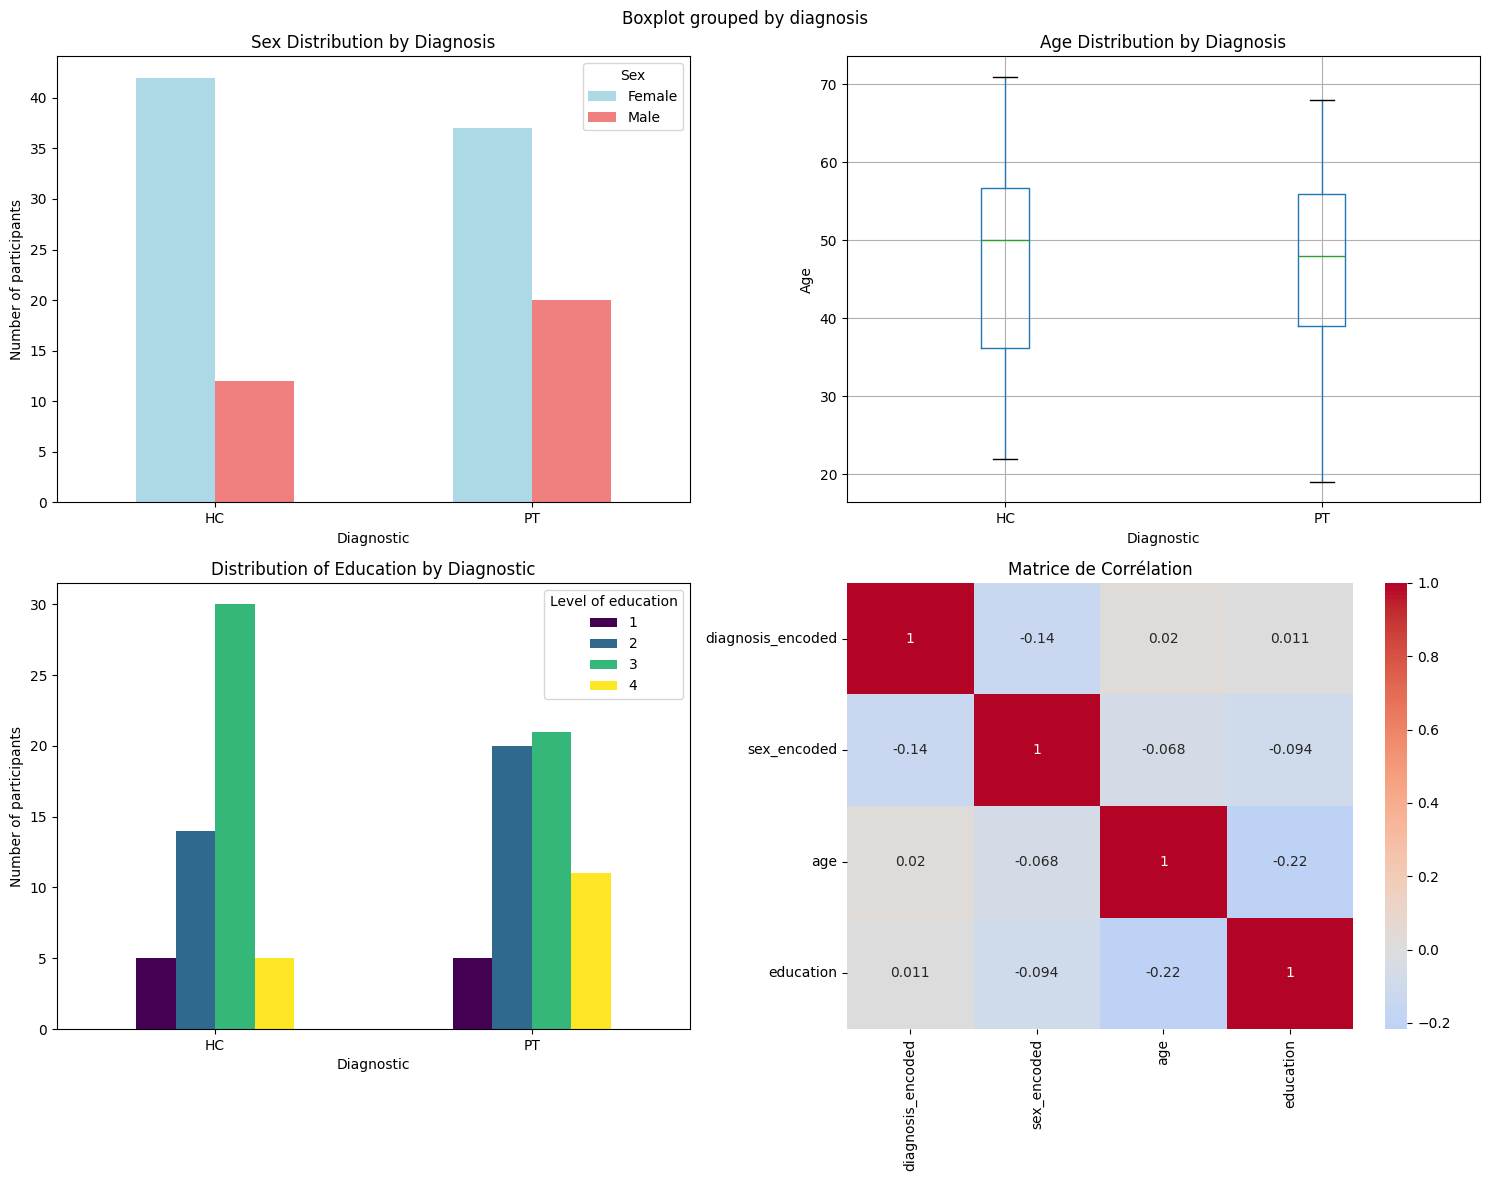


 Q1. Given these results, is the dataset biased?

 Test results (α = 0.05):
   - Sex (Chi²): p = 0.1984  Not significant
   - Age (Mann-Whitney): p = 0.9201  Not significant
   - Education (Chi²): p = 0.1855  Not significant

 ANSWER Q1:
 The dataset is NOT biased - no significant differences detected
   Variables biaisées: 0/3

💾 Data saved: AndroidsDS_TDs/TD02_Classification/demographics_data.csv


In [3]:


print(" BIAS ANALYSIS IN DATA")
print("="*60)

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
print(" Installing required packages...")
import subprocess
import sys

def install_package(package):
    try:
        __import__(package)
        print(f" {package} already installed")
    except ImportError:
        print(f" Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f" {package} installed successfully")
install_package("pingouin")
install_package("statsmodels")

import pingouin as pg
import statsmodels.formula.api as smf

print("\n" + "="*60)
print(" STEP 1: Extracting demographic information")

def extract_demographics_from_filename(filename):
    name = filename.replace('.csv', '')
    pattern = r'(\d+)_([PC])([MF])(\d+)_(\d+)'
    match = re.match(pattern, name)

    if match:
        participant_id = match.group(1)
        diagnosis = 'HC' if match.group(2) == 'C' else 'PT' 
        sex = 'Female' if match.group(3) == 'F' else 'Male'  
        age = int(match.group(4))
        education = int(match.group(5))

        return {
            'participant_id': name,
            'diagnosis': diagnosis,
            'sex': sex,
            'age': age,
            'education': education
        }
    else:
        print(f" Unable to parse: {filename}")
        return None

def load_demographics_data():
    demographics = []
    
   
    reading_hc_path = "/home/rsana/speech_processing/original_features/reading/HC"
    reading_pt_path = "/home/rsana/speech_processing/original_features/reading/PT"

    print(f" Analyzing Reading Task files...")
    
    if os.path.exists(reading_hc_path):
        hc_files = [f for f in os.listdir(reading_hc_path) if f.endswith('.csv')]
        print(f"   - HC: {len(hc_files)} files")
        for filename in hc_files:
            demo = extract_demographics_from_filename(filename)
            if demo:
                demographics.append(demo)
    else:
        print(f" HC path not found: {reading_hc_path}")
        
    if os.path.exists(reading_pt_path):
        pt_files = [f for f in os.listdir(reading_pt_path) if f.endswith('.csv')]
        print(f"   - PT: {len(pt_files)} files")
        for filename in pt_files:
            demo = extract_demographics_from_filename(filename)
            if demo:
                demographics.append(demo)
    else:
        print(f" PT path not found: {reading_pt_path}")
    

    if len(demographics) == 0:
        print(" No demographic data extracted!")
        return None
        
    df = pd.DataFrame(demographics)
    print(f"\n Demographic dataset created: {len(df)} participants")
    return df
df_demo = load_demographics_data()

print("\n Data overview:")
print(df_demo.head(10))

print(f"\n Descriptive statistics:")
print(f"   - Total participants: {len(df_demo)}")
print(f"   - HC: {len(df_demo[df_demo['diagnosis'] == 'HC'])}")
print(f"   - PT: {len(df_demo[df_demo['diagnosis'] == 'PT'])}")

print("\n" + "="*60)
print(" STEP 2: TASK n°2 - Description of demographic variables")
print("\n Distribution par diagnostic:")

# Sexe
sex_crosstab = pd.crosstab(df_demo['diagnosis'], df_demo['sex'], margins=True)
print(f"\n SEXE by diagnostic:")
print(sex_crosstab)

# Pourcentages
sex_pct = pd.crosstab(df_demo['diagnosis'], df_demo['sex'], normalize='index') * 100
print(f"\n SEXE by diagnostic (%):")
print(sex_pct.round(1))

# Âge
print(f"\n ÂGE by diagnostic:")
age_stats = df_demo.groupby('diagnosis')['age'].describe()
print(age_stats)
print(f"\n EDUCATION by diagnosis:")
edu_crosstab = pd.crosstab(df_demo['diagnosis'], df_demo['education'], margins=True)
print(edu_crosstab)
edu_pct = pd.crosstab(df_demo['diagnosis'], df_demo['education'], normalize='index') * 100
print(f"\n EDUCATION by diagnosis (%):")
print(edu_pct.round(1))

print("\n" + "="*60)
print("STEP 3: TASK #3 - Statistical tests to identify bias")

print("\n Statistical tests:")
print("\n1️ TEST CHI² for the SEXE:")
chi2_sex = pg.chi2_independence(df_demo, x='diagnosis', y='sex')
print(chi2_sex)
print("\n2️ TEST MANN-WHITNEY U for the ÂGE:")
hc_ages = df_demo[df_demo['diagnosis'] == 'HC']['age']
pt_ages = df_demo[df_demo['diagnosis'] == 'PT']['age']

mwu_age = pg.mwu(hc_ages, pt_ages, alternative='two-sided')
print(mwu_age)
print("\n3️ CHI² TEST FOR EDUCATION:")
chi2_edu = pg.chi2_independence(df_demo, x='diagnosis', y='education')
print(chi2_edu)

print("\n" + "="*60)
print(" STEP 4: Visualizations")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sex_counts = df_demo.groupby(['diagnosis', 'sex']).size().unstack(fill_value=0)
sex_counts.plot(kind='bar', ax=axes[0,0], color=['lightblue', 'lightcoral'])
axes[0,0].set_title('Sex Distribution by Diagnosis')
axes[0,0].set_xlabel('Diagnostic')
axes[0,0].set_ylabel('Number of participants')
axes[0,0].legend(title='Sex')
axes[0,0].tick_params(axis='x', rotation=0)
df_demo.boxplot(column='age', by='diagnosis', ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Diagnosis')
axes[0,1].set_xlabel('Diagnostic')
axes[0,1].set_ylabel('Age')
edu_counts = df_demo.groupby(['diagnosis', 'education']).size().unstack(fill_value=0)
edu_counts.plot(kind='bar', ax=axes[1,0], colormap='viridis')
axes[1,0].set_title('Distribution of Education by Diagnostic')
axes[1,0].set_xlabel('Diagnostic')
axes[1,0].set_ylabel('Number of participants')
axes[1,0].legend(title='Level of education')
axes[1,0].tick_params(axis='x', rotation=0)
df_encoded = df_demo.copy()
df_encoded['diagnosis_encoded'] = df_encoded['diagnosis'].map({'HC': 0, 'PT': 1})
df_encoded['sex_encoded'] = df_encoded['sex'].map({'Male': 0, 'Female': 1})

corr_matrix = df_encoded[['diagnosis_encoded', 'sex_encoded', 'age', 'education']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
axes[1,1].set_title('Matrice de Corrélation')

plt.tight_layout()
plt.show()
print("\n" + "="*60)
print(" Q1. Given these results, is the dataset biased?")


def extract_pvalue(test_result, pval_column='pval'):
    if isinstance(test_result, tuple):
        return test_result[1]  
    else:
        return test_result[pval_column].iloc[0]


if isinstance(chi2_sex, tuple):
    p_sex = chi2_sex[2]['pval'].iloc[0] 
else:
    p_sex = chi2_sex['pval'].iloc[0]
if isinstance(mwu_age, tuple):
    p_age = mwu_age[1] 
else:
    p_age = mwu_age['p-val'].iloc[0]
if isinstance(chi2_edu, tuple):
    p_edu = chi2_edu[2]['pval'].iloc[0]  
else:
    p_edu = chi2_edu['pval'].iloc[0]
print(f"\n Test results (α = 0.05):")
print(f"   - Sex (Chi²): p = {p_sex:.4f} {' Not significant' if p_sex > 0.05 else ' Significant'}")
print(f"   - Age (Mann-Whitney): p = {p_age:.4f} {' Not significant' if p_age > 0.05 else ' Significant'}")
print(f"   - Education (Chi²): p = {p_edu:.4f} {' Not significant' if p_edu > 0.05 else ' Significant'}")
bias_count = sum([p_sex <= 0.05, p_age <= 0.05, p_edu <= 0.05])
print(f"\n ANSWER Q1:")
if bias_count == 0:
    print(" The dataset is NOT biased - no significant differences detected")
elif bias_count == 1:
    print("The dataset has SLIGHT BIAS - one variable differs significantly")
elif bias_count == 2:
    print(" The dataset has MODERATE BIAS - two variables differ significantly")
else:
    print("The dataset is HIGHLY BIAS - all variables differ significantly")
print(f"   Variables biaisées: {bias_count}/3")

# Create directory if it doesn't exist
os.makedirs('TD03_results', exist_ok=True)
df_demo.to_csv('TD03_results/demographics_data.csv', index=False)
print(f"\n💾 Data saved: AndroidsDS_TDs/TD02_Classification/demographics_data.csv")


 STEP 4: TASK n°4 - Logistic regression analysis
 Variables for regression:
   - dep (dependent variable): 0 = HC, 1 = PT
   - sex_encoded: 0 = Male, 1 = Female
   - age: continuous variable
   - education: ordinal variable (1-4)

 MODEL 1: Main effects only (sex + age + education)
Optimization terminated successfully.
         Current function value: 0.682561
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                    dep   No. Observations:                  111
Model:                          Logit   Df Residuals:                      107
Method:                           MLE   Df Model:                            3
Date:                Wed, 08 Oct 2025   Pseudo R-squ.:                 0.01475
Time:                        16:45:09   Log-Likelihood:                -75.764
converged:                       True   LL-Null:                       -76.899
Covariance Type:            nonrobust   LLR p-value:          

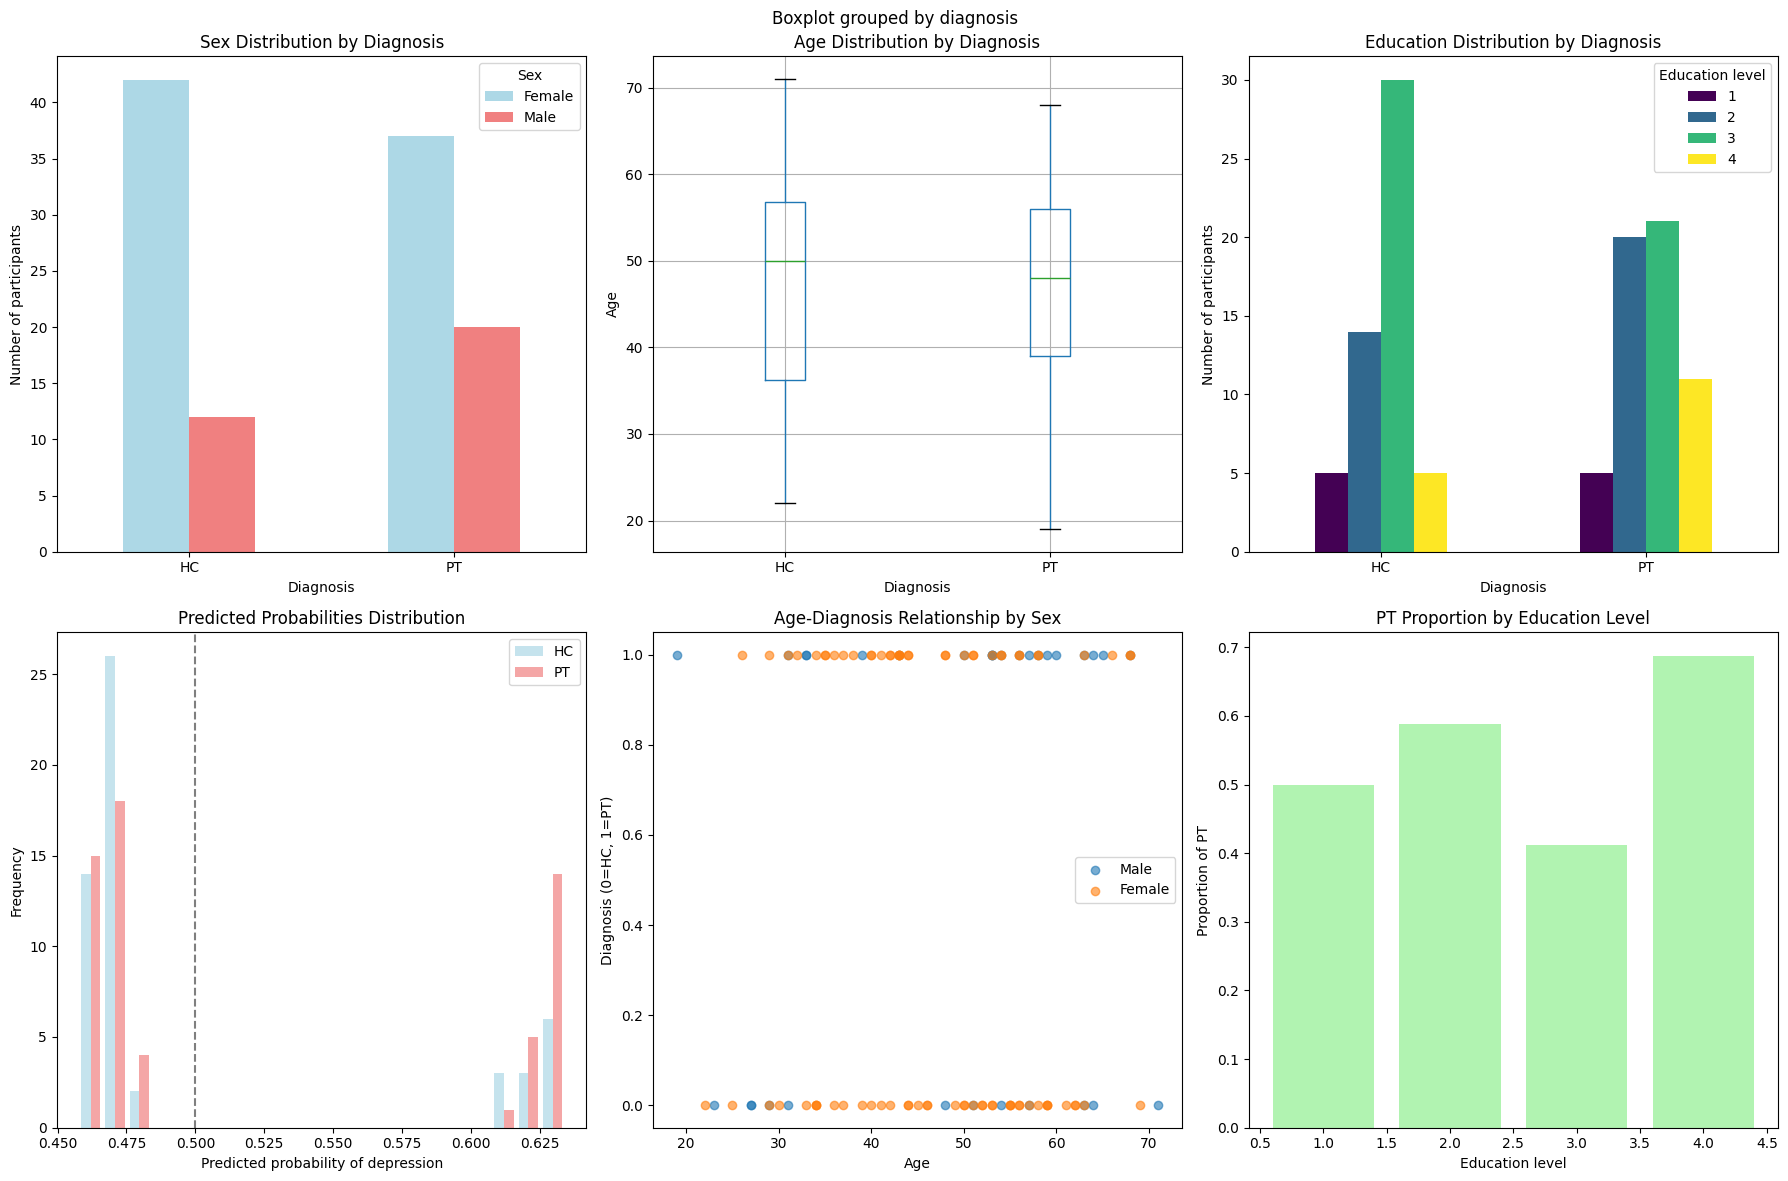


 COMPLETE BIAS ANALYSIS FINISHED
 Data saved: AndroidsDS_TDs/TD03/demographics_data.csv


In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import subprocess
import sys
import pingouin as pg
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from scipy import stats  

print(" STEP 4: TASK n°4 - Logistic regression analysis")
df_reg = df_demo.copy()
df_reg['dep'] = (df_reg['diagnosis'] == 'PT').astype(int)  # 0 = HC, 1 = PT
df_reg['sex_encoded'] = (df_reg['sex'] == 'Female').astype(int)  # 0 = Male, 1 = Female

print(f" Variables for regression:")
print(f"   - dep (dependent variable): 0 = HC, 1 = PT")
print(f"   - sex_encoded: 0 = Male, 1 = Female") 
print(f"   - age: continuous variable")
print(f"   - education: ordinal variable (1-4)")

print("\n MODEL 1: Main effects only (sex + age + education)")
model1 = smf.logit('dep ~ sex_encoded + age + education', data=df_reg).fit()
print(model1.summary())

print("\n MODEL 2: With interactions (sex * age * education)")
model2 = smf.logit('dep ~ sex_encoded * age * education', data=df_reg).fit()
print(model2.summary())

lr_test = -2 * (model1.llf - model2.llf)
df_diff = model2.df_model - model1.df_model
p_value_lr = 1 - stats.chi2.cdf(lr_test, df_diff) 

print(f"\n Likelihood ratio test (Model 1 vs Model 2):")
print(f"   - LR statistic: {lr_test:.4f}")
print(f"   - df: {df_diff}")
print(f"   - p-value: {p_value_lr:.4f}")
print(f"   - Conclusion: {'Interactions are significant' if p_value_lr < 0.05 else 'Interactions are not significant'}")
predictions1 = model1.predict()
predictions2 = model2.predict()
predicted_class1 = (predictions1 > 0.5).astype(int)
predicted_class2 = (predictions2 > 0.5).astype(int)
actual_class = df_reg['dep']

accuracy1 = accuracy_score(actual_class, predicted_class1)
accuracy2 = accuracy_score(actual_class, predicted_class2)

print(f"\n📊 Model performance:")
print(f"   - Model 1 (main effects) accuracy: {accuracy1:.3f}")
print(f"   - Model 2 (interactions) accuracy: {accuracy2:.3f}")

print(f"\n📈 Model comparison (AIC):")
print(f"   - Model 1 AIC: {model1.aic:.2f}")
print(f"   - Model 2 AIC: {model2.aic:.2f}")
print(f"   - Best model: {'Model 1' if model1.aic < model2.aic else 'Model 2'}")
print("\n" + "="*60)
print(" STEP 5: Visualizations")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sex_counts = df_demo.groupby(['diagnosis', 'sex']).size().unstack(fill_value=0)
sex_counts.plot(kind='bar', ax=axes[0,0], color=['lightblue', 'lightcoral'])
axes[0,0].set_title('Sex Distribution by Diagnosis')
axes[0,0].set_xlabel('Diagnosis')
axes[0,0].set_ylabel('Number of participants')
axes[0,0].legend(title='Sex')
axes[0,0].tick_params(axis='x', rotation=0)

df_demo.boxplot(column='age', by='diagnosis', ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Diagnosis')
axes[0,1].set_xlabel('Diagnosis')
axes[0,1].set_ylabel('Age')


edu_counts = df_demo.groupby(['diagnosis', 'education']).size().unstack(fill_value=0)
edu_counts.plot(kind='bar', ax=axes[0,2], colormap='viridis')
axes[0,2].set_title('Education Distribution by Diagnosis')
axes[0,2].set_xlabel('Diagnosis')
axes[0,2].set_ylabel('Number of participants')
axes[0,2].legend(title='Education level')
axes[0,2].tick_params(axis='x', rotation=0)


predictions = model1.predict()
axes[1,0].hist([predictions[actual_class==0], predictions[actual_class==1]],
               bins=20, alpha=0.7, label=['HC', 'PT'], color=['lightblue', 'lightcoral'])
axes[1,0].set_xlabel('Predicted probability of depression')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Predicted Probabilities Distribution')
axes[1,0].legend()
axes[1,0].axvline(x=0.5, color='black', linestyle='--', alpha=0.5)


for sex_val, sex_label in [(0, 'Male'), (1, 'Female')]:
    subset = df_reg[df_reg['sex_encoded'] == sex_val]
    axes[1,1].scatter(subset['age'], subset['dep'], alpha=0.6, label=sex_label)
axes[1,1].set_xlabel('Age')
axes[1,1].set_ylabel('Diagnosis (0=HC, 1=PT)')
axes[1,1].set_title('Age-Diagnosis Relationship by Sex')
axes[1,1].legend()

edu_means = df_reg.groupby('education')['dep'].mean()
axes[1,2].bar(edu_means.index, edu_means.values, color='lightgreen', alpha=0.7)
axes[1,2].set_xlabel('Education level')
axes[1,2].set_ylabel('Proportion of PT')
axes[1,2].set_title('PT Proportion by Education Level')

plt.tight_layout()
plt.show()

print(f"\n COMPLETE BIAS ANALYSIS FINISHED")


os.makedirs('AndroidsDS_TDs/TD03', exist_ok=True)
df_demo.to_csv('AndroidsDS_TDs/TD03/demographics_data.csv', index=False)
print(f" Data saved: AndroidsDS_TDs/TD03/demographics_data.csv")


In [7]:
print(" TASK 5: Observing Univariate Biases - Stratified 5-Fold Cross-Validation")
print("="*80)

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
X = df_reg[['sex_encoded', 'age', 'education']].values
y = df_reg['dep'].values

print(f" Dataset overview:")
print(f"   - Total samples: {len(X)}")
print(f"   - Features: {X.shape[1]} (sex_encoded, age, education)")
print(f"   - HC (0): {sum(y == 0)} participants")
print(f"   - PT (1): {sum(y == 1)} participants")


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
all_y_pred = []
all_y_gt = []
all_fold_results = []
fold_predictions = {}

print(f"\n Performing Stratified 5-Fold Cross-Validation:")
print("-" * 60)
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    print(f"\n FOLD {fold}:")
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    print(f"   - Train: {len(X_train)} samples (HC: {sum(y_train == 0)}, PT: {sum(y_train == 1)})")
    print(f"   - Test:  {len(X_test)} samples (HC: {sum(y_test == 0)}, PT: {sum(y_test == 1)})")
    
    
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] 
    fold_predictions[f'fold_{fold}'] = {
        'test_indices': test_idx,
        'y_gt': y_test,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'accuracy': (y_pred == y_test).mean()
    }
    all_y_pred.extend(y_pred)
    all_y_gt.extend(y_test)
    accuracy = (y_pred == y_test).mean()
    print(f"   - Accuracy: {accuracy:.3f}")
    
    all_fold_results.append({
        'fold': fold,
        'accuracy': accuracy,
        'n_test': len(y_test),
        'n_correct': sum(y_pred == y_test)
    })
all_y_pred = np.array(all_y_pred)
all_y_gt = np.array(all_y_gt)

print(f"\n" + "="*60)
print(f" OVERALL CROSS-VALIDATION RESULTS:")
print(f"   - Mean accuracy: {np.mean([r['accuracy'] for r in all_fold_results]):.3f}")
print(f"   - Std accuracy: {np.std([r['accuracy'] for r in all_fold_results]):.3f}")
print(f"\n Overall Confusion Matrix:")
cm = confusion_matrix(all_y_gt, all_y_pred)
print(cm)
print(f"\n Overall Classification Report:")
print(classification_report(all_y_gt, all_y_pred, target_names=['HC', 'PT']))

print(f"\n" + "="*60)
print(f" BIAS ANALYSIS BY SEX:")
sex_bias_results = []

for fold_name, fold_data in fold_predictions.items():
    fold_num = fold_name.split('_')[1]
    test_indices = fold_data['test_indices']
    test_sex = df_reg.iloc[test_indices]['sex_encoded'].values
    test_sex_labels = df_reg.iloc[test_indices]['sex'].values
    
    y_gt_fold = fold_data['y_gt']
    y_pred_fold = fold_data['y_pred']
    
    print(f"\n FOLD {fold_num} - Sex Bias Analysis:")
    for sex_val, sex_label in [(0, 'Male'), (1, 'Female')]:
        sex_mask = test_sex == sex_val
        
        if sum(sex_mask) > 0:  
            sex_y_gt = y_gt_fold[sex_mask]
            sex_y_pred = y_pred_fold[sex_mask]
            sex_accuracy = (sex_y_gt == sex_y_pred).mean()
            
            print(f"   {sex_label}:")
            print(f"     - N participants: {sum(sex_mask)}")
            print(f"     - Accuracy: {sex_accuracy:.3f}")
            print(f"     - HC actual: {sum(sex_y_gt == 0)}, PT actual: {sum(sex_y_gt == 1)}")
            print(f"     - HC predicted: {sum(sex_y_pred == 0)}, PT predicted: {sum(sex_y_pred == 1)}")
            
            sex_bias_results.append({
                'fold': fold_num,
                'sex': sex_label,
                'n_participants': sum(sex_mask),
                'accuracy': sex_accuracy,
                'hc_actual': sum(sex_y_gt == 0),
                'pt_actual': sum(sex_y_gt == 1),
                'hc_predicted': sum(sex_y_pred == 0),
                'pt_predicted': sum(sex_y_pred == 1)
            })

print(f"\n" + "="*60)
print(f" SUMMARY: Sex Bias Analysis Across All Folds")
sex_bias_df = pd.DataFrame(sex_bias_results)

if len(sex_bias_df) > 0:
    print(f"\n Average accuracy by sex:")
    sex_accuracy_summary = sex_bias_df.groupby('sex')['accuracy'].agg(['mean', 'std', 'count'])
    print(sex_accuracy_summary)
    
    # Statistical test for sex bias in predictions
    male_accuracies = sex_bias_df[sex_bias_df['sex'] == 'Male']['accuracy'].values
    female_accuracies = sex_bias_df[sex_bias_df['sex'] == 'Female']['accuracy'].values
    
    if len(male_accuracies) > 0 and len(female_accuracies) > 0:
        from scipy.stats import ttest_ind
        t_stat, p_val = ttest_ind(male_accuracies, female_accuracies)
        
        print(f"\n Statistical test for sex bias in model performance:")
        print(f"   - Male accuracy: {np.mean(male_accuracies):.3f} ± {np.std(male_accuracies):.3f}")
        print(f"   - Female accuracy: {np.mean(female_accuracies):.3f} ± {np.std(female_accuracies):.3f}")
        print(f"   - T-test: t = {t_stat:.3f}, p = {p_val:.3f}")
        print(f"   - Conclusion: {'Significant sex bias detected' if p_val < 0.05 else 'No significant sex bias detected'}")

print(f"\n TASK 5 COMPLETED: Stratified 5-Fold Cross-Validation with Bias Analysis")


# Save fold predictions
fold_results_df = pd.DataFrame(all_fold_results)
fold_results_df.to_csv('TD03_results/fold_results.csv', index=False)

# Save sex bias analysis
if len(sex_bias_df) > 0:
    sex_bias_df.to_csv('TD03_results/sex_bias_analysis.csv', index=False)

print(f" Results saved:")


 TASK 5: Observing Univariate Biases - Stratified 5-Fold Cross-Validation
 Dataset overview:
   - Total samples: 111
   - Features: 3 (sex_encoded, age, education)
   - HC (0): 54 participants
   - PT (1): 57 participants

 Performing Stratified 5-Fold Cross-Validation:
------------------------------------------------------------

 FOLD 1:
   - Train: 88 samples (HC: 43, PT: 45)
   - Test:  23 samples (HC: 11, PT: 12)
   - Accuracy: 0.478

 FOLD 2:
   - Train: 89 samples (HC: 43, PT: 46)
   - Test:  22 samples (HC: 11, PT: 11)
   - Accuracy: 0.409

 FOLD 3:
   - Train: 89 samples (HC: 43, PT: 46)
   - Test:  22 samples (HC: 11, PT: 11)
   - Accuracy: 0.409

 FOLD 4:
   - Train: 89 samples (HC: 43, PT: 46)
   - Test:  22 samples (HC: 11, PT: 11)
   - Accuracy: 0.409

 FOLD 5:
   - Train: 89 samples (HC: 44, PT: 45)
   - Test:  22 samples (HC: 10, PT: 12)
   - Accuracy: 0.364

 OVERALL CROSS-VALIDATION RESULTS:
   - Mean accuracy: 0.414
   - Std accuracy: 0.037

 Overall Confusion Matrix